<a href="https://colab.research.google.com/github/DS25Shikha/l/blob/main/Copy_of_Week_1_Programming_MLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [13]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28).T
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

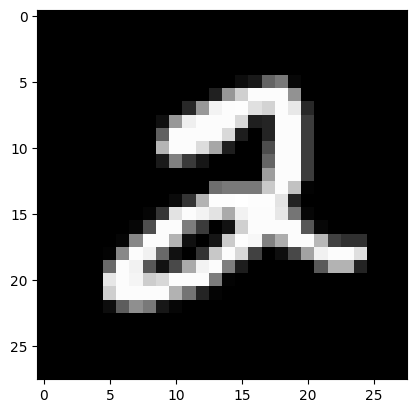

In [14]:
import matplotlib.pyplot as plt
img = X[:,0].reshape(28, 28)
plt.imshow(img, cmap = 'gray');


In [15]:
def center(X):
  return X - X.mean(axis=1).reshape(-1,1)

  d, n =X.shape
  X_prime = center(X)

In [24]:
def covariance(X):
  return X @ X.T / X.shape[1]
X_prime = center(X)
C = covariance(X_prime)

In [27]:
def compute_pc(C):
  d = C.shape[0]
  eigval , eigvec = np.linalg.eigh(C)
  w_1,w_2 = eigvec[:, -1],eigvec[:, -2]
  return w_1,w_2



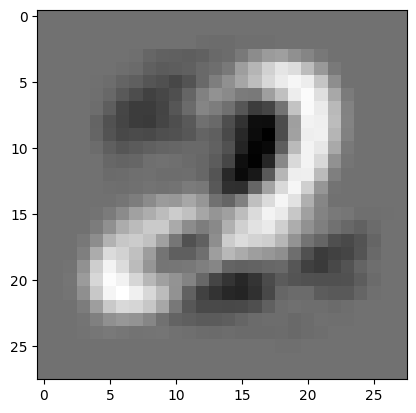

In [29]:
d = C.shape[0]
eigval , eigvec = np.linalg.eigh(C)
w_1,w_2 = eigvec[:, -1],eigvec[:, -2]
w_1_image = w_1.reshape(28,28)
plt.imshow(w_1_image, cmap = 'gray')

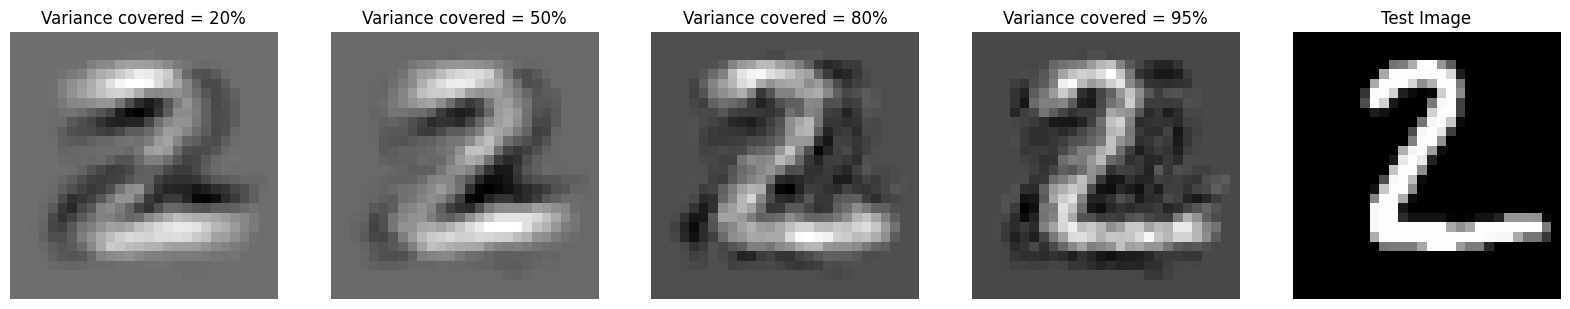

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select images of digit "2"
X = X_train[y_train == 2][:100].reshape(-1, 28 * 28).T
test_image = X_test[y_test == 2][0].reshape(28 * 28)

def center(X):
    """Center the data by subtracting the mean."""
    return X - X.mean(axis=1, keepdims=True)

def covariance(X):
    """Calculate the covariance matrix."""
    return X @ X.T / X.shape[1]

def compute_pc(C):
    """Compute the principal components."""
    eigval, eigvec = np.linalg.eigh(C)
    return eigvec[:, -2:], eigval  # Return the last two eigenvectors and eigenvalues

# Center the data and calculate covariance
X_prime = center(X)
C = covariance(X_prime)

def reconstruction(C, test_image, thresh):
    """Reconstruct the image from PCA components based on the variance threshold."""
    eigval, eigvec = np.linalg.eigh(C)
    eigval = np.flip(eigval)  # Reverse the order
    total_variance = np.sum(eigval)

    # Determine the number of components to keep based on the threshold
    K = np.searchsorted(np.cumsum(eigval) / total_variance, thresh) + 1

    # Select the top K eigenvectors
    W = eigvec[:, -K:]  # Take the last K eigenvectors
    coeff = W.T @ (test_image - test_image.mean())  # Compute coefficients
    return W @ coeff + test_image.mean()  # Reconstruct image and add mean back

# Plot the reconstructed images
plt.figure(figsize=(20, 20))

# Reconstruct and plot for different variance thresholds
thresholds = [0.20, 0.50, 0.80, 0.95]
for i, thresh in enumerate(thresholds):
    recon_image = reconstruction(C, test_image, thresh)
    plt.subplot(1, 5, i + 1)
    plt.imshow(recon_image.reshape(28, 28), cmap='gray')
    plt.title(f"Variance covered = {int(thresh * 100)}%")
    plt.axis('off')

# Display the original test image
plt.subplot(1, 5, 5)
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title("Test Image")
plt.axis('off')

plt.show()


## Problem-1

How many samples does the dataset have?

## Problem-2

How many features does the dataset have?

In [32]:
import numpy as np
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_train_samples = X_train.shape[0]
num_test_samples = X_test.shape[0]
num_features = X_train.shape[1] * X_train.shape[2]

print(f"Number of training samples: {num_train_samples}")
print(f"Number of test samples: {num_test_samples}")
print(f"Number of features: {num_features}")


Number of training samples: 60000
Number of test samples: 10000
Number of features: 784


In [33]:
import numpy as np
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = X_train[y_train == 2][:100].reshape(-1, 28 * 28).T  # 100 samples of digit '2'
d, n = X.shape

print(f"d (number of features): {d}")
print(f"n (number of samples): {n}")


d (number of features): 784
n (number of samples): 100


In [ ]:
# Enter your solution here

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

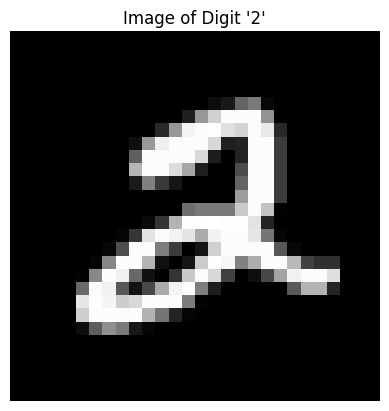

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select one image of the digit '2' from the training set
image_index = 0  # Index of the image you want to visualize
sample_image = X_train[y_train == 2][image_index]  # Get the first '2' image

# Visualize the image
plt.imshow(sample_image, cmap='gray')
plt.title("Image of Digit '2'")
plt.axis('off')  # Hide axis
plt.show()


## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [43]:
import numpy as np
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select images of digit '2'
X = X_train[y_train == 2][:100].reshape(-1, 28 * 28)  # Reshape to (100, 784)

# Center the dataset around its mean
X_prime = X - X.mean(axis=0)

# Get the number of samples (n) and features (d)
n, d = X_prime.shape

# Compute the sum of squares of the centered dataset
sum_of_squares = np.sum(X_prime**2)

# Calculate the final result as (1 / (n * d)) * sqrt(sum of squares)
result = (1 / (n * d)) * np.sqrt(sum_of_squares)

# Print the result rounded to two decimal places
print(f"{result:.2f}")


0.23


In [46]:
import numpy as np
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select images of digit '2'
X = X_train[y_train == 2][:100].reshape(-1, 28 * 28)  # Reshape to (100, 784)

# Center the dataset around its mean
X_prime = X - X.mean(axis=0)

# Compute the covariance matrix C
C = np.cov(X_prime, rowvar=False)

# Get the number of features (d)
d = C.shape[0]

# Compute the sum of squares of the covariance matrix
sum_of_squares = np.sum(C**2)

# Calculate the final result
result = (1 / (d**2)) * np.sqrt(sum_of_squares)

# Print the result rounded to two decimal places
print(f"{result:.2f}")


1.38


In [49]:
import numpy as np
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select images of digit '2'
X = X_train[y_train == 2][:100].reshape(-1, 28 * 28)  # Reshape to (100, 784)

# Center the dataset around its mean
X_mean = X.mean(axis=0)
X_prime = X - X_mean  # Center the data

# Compute the covariance matrix C
C = np.cov(X_prime, rowvar=False)  # C should be of shape (d, d)

# Get the number of features (d)
d = C.shape[0]

# Compute the sum of squares of the covariance matrix
sum_of_squares = np.sum(C**2)  # Sum of squares of all elements in C

# Calculate the final result
result = (1 / (d**2)) * np.sqrt(sum_of_squares)

# Print the result rounded to two decimal places
print(f"{result:.3f}")


1.379


In [48]:
print("Covariance Matrix:\n", C)
print("Shape of Covariance Matrix:", C.shape)


Covariance Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of Covariance Matrix: (784, 784)


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [50]:
import numpy as np
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select images of digit '2'
X = X_train[y_train == 2][:100].reshape(-1, 28 * 28)  # Reshape to (100, 784)

# Center the dataset around its mean
X_mean = X.mean(axis=0)
X_prime = X - X_mean  # Center the data

# Compute the covariance matrix C
C = np.cov(X_prime, rowvar=False)  # C should be of shape (d, d)

# Compute eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eigh(C)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[sorted_indices]
eigvecs_sorted = eigvecs[:, sorted_indices]

# Get the first two principal components
w1 = eigvecs_sorted[:, 0]  # First principal component
w2 = eigvecs_sorted[:, 1]  # Second principal component

# Calculate the sum of the two principal components
w_sum = w1 + w2

# Compute the absolute value of the desired sum
result = np.abs(np.sum(w_sum))

# Print the result rounded to two decimal places
print(f"{result:.2f}")


1.05


## Problem-7

Visualize the first principal component as an image.

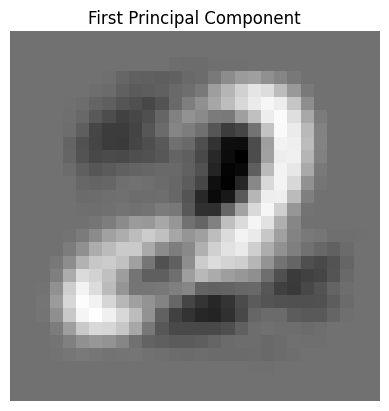

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select images of digit '2'
X = X_train[y_train == 2][:100].reshape(-1, 28 * 28)  # Reshape to (100, 784)

# Center the dataset around its mean
X_prime = X - X.mean(axis=0)

# Compute the covariance matrix C
C = np.cov(X_prime, rowvar=False)

# Compute eigenvalues and eigenvectors
eigval, eigvec = np.linalg.eigh(C)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigval)[::-1]
w1 = eigvec[:, sorted_indices[0]]

# Reshape the first principal component back to 28x28
w1_image = w1.reshape(28, 28)

# Visualize the first principal component
plt.imshow(w1_image, cmap='gray')
plt.title("First Principal Component")
plt.axis('off')  # Hide axis
plt.show()



## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [39]:
import numpy as np
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select images of digit '2'
X = X_train[y_train == 2][:100].reshape(-1, 28 * 28)

# Center the dataset around its mean
X_prime = X - X.mean(axis=0)

# Compute the covariance matrix C
C = np.cov(X_prime, rowvar=False)

# Compute eigenvalues
eigval, _ = np.linalg.eigh(C)

# Sort eigenvalues in descending order
sorted_eigval = np.sort(eigval)[::-1]

# Calculate total variance
total_variance = np.sum(sorted_eigval)

# Calculate cumulative variance
cumulative_variance = np.cumsum(sorted_eigval)

# Find the smallest k for which the cumulative variance is at least 95% of total variance
k = np.searchsorted(cumulative_variance, 0.95 * total_variance) + 1

# Print the result
print(f"The smallest value of k to capture at least 95% of the variance: {k}")


The smallest value of k to capture at least 95% of the variance: 53


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



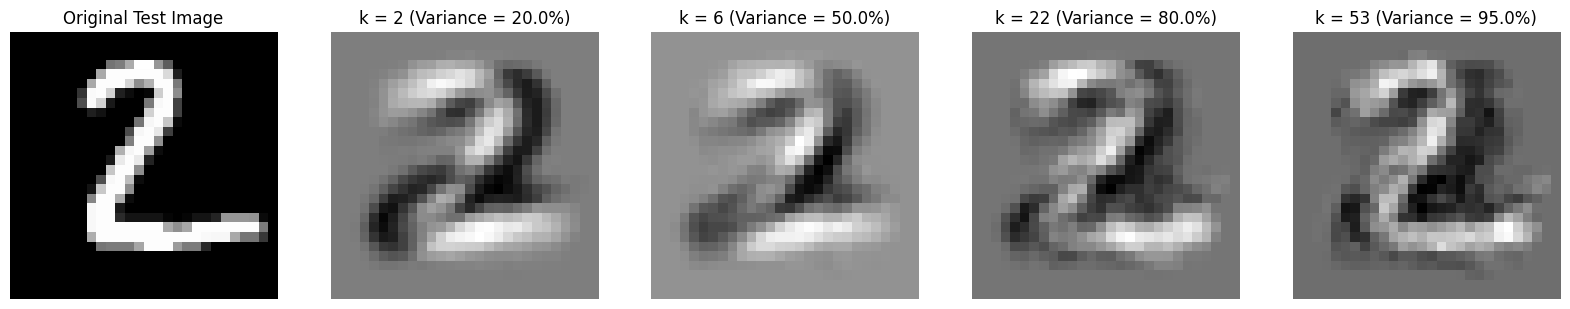

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select images of digit '2' for training
X_train_digit_2 = X_train[y_train == 2][:100].reshape(-1, 28 * 28)

# Center the dataset around its mean
X_prime = X_train_digit_2 - X_train_digit_2.mean(axis=0)

# Compute the covariance matrix C
C = np.cov(X_prime, rowvar=False)

# Compute eigenvalues and eigenvectors
eigval, eigvec = np.linalg.eigh(C)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigval)[::-1]
sorted_eigval = eigval[sorted_indices]
sorted_eigvec = eigvec[:, sorted_indices]

# Calculate total variance
total_variance = np.sum(sorted_eigval)

# Calculate cumulative variance
cumulative_variance = np.cumsum(sorted_eigval)

# Define the variance thresholds
thresholds = [0.20, 0.50, 0.80, 0.95]
k_values = [np.searchsorted(cumulative_variance, thresh * total_variance) + 1 for thresh in thresholds]

# Select a test image
test_image_index = 0  # You can change this index to visualize different test images
test_image = X_test[y_test == 2][test_image_index].reshape(28 * 28)
test_image_centered = test_image - X_train_digit_2.mean(axis=0)

# Visualization setup
plt.figure(figsize=(20, 5))

# Plot the original test image
plt.subplot(1, 5, 1)
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title("Original Test Image")
plt.axis('off')

# Reconstruct and visualize the image using the top k principal components
for idx, k in enumerate(k_values):
    w_k = sorted_eigvec[:, :k]
    coeff = w_k.T @ test_image_centered  # Project the test image
    recon_image = w_k @ coeff  # Reconstruct the image

    plt.subplot(1, 5, idx + 2)
    plt.imshow(recon_image.reshape(28, 28), cmap='gray')
    plt.title(f"k = {k} (Variance = {thresholds[idx]*100}%)")
    plt.axis('off')

plt.show()
